# Depth data

CRS: EPSG:4326
Dimensions: 15600 x 6000
Bounds: BoundingBox(left=-130.0, bottom=23.999999999999996, right=-65.0, top=49.0)
Number of bands: 1
Data type: ('int16',)
Resolution: (0.004166666666666667, 0.0041666666666666675)
Min depth: -6233
Max depth: 4336
Shape: (6000, 15600)


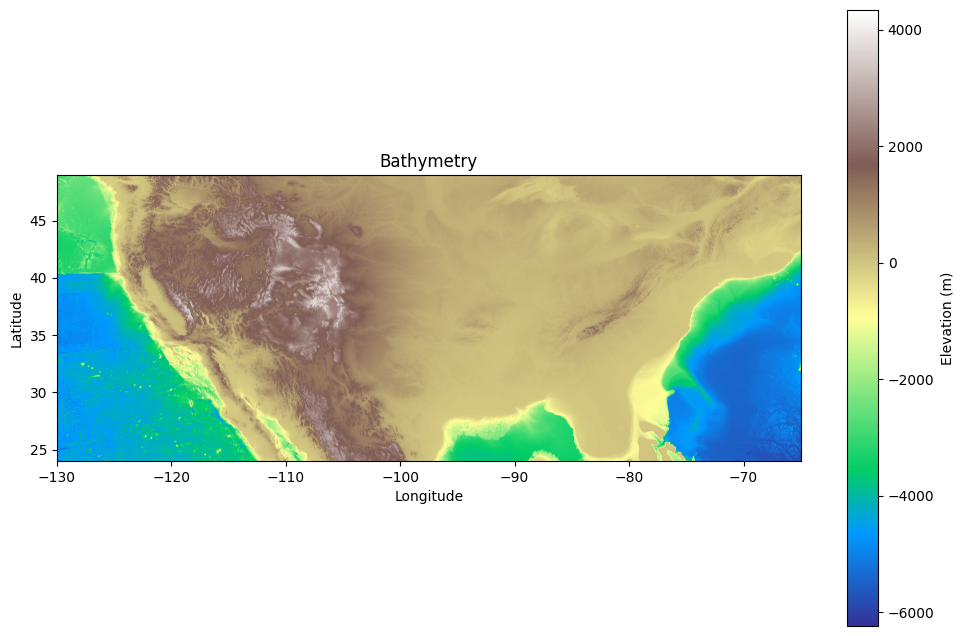

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import rasterio

# Open the file
src = rasterio.open(
    "../../data/raw/bathymetry/GEBCO_19_Feb_2026_a1e96db8d3d5/gebco_2025_n49.0_s24.0_w-130.0_e-65.0.tif"
)

# Basic info
print("CRS:", src.crs)
print("Dimensions:", src.width, "x", src.height)
print("Bounds:", src.bounds)
print("Number of bands:", src.count)
print("Data type:", src.dtypes)
print("Resolution:", src.res)

# Read the data into a numpy array
data = src.read(1)  # band 1

print("Min depth:", np.nanmin(data))
print("Max depth:", np.nanmax(data))
print("Shape:", data.shape)

# Plot it
fig, ax = plt.subplots(figsize=(12, 8))
img = ax.imshow(
    data,
    cmap="terrain",
    extent=[src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top],
)
plt.colorbar(img, label="Elevation (m)")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title("Bathymetry")
plt.show()

src.close()